In [12]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import scipy
from scipy import linalg
from sympy import *
import numpy as np

#Exercise 4

---



Load image function

In [13]:
def load_image(im):  
    try:
        imx = Image.open(im)
        return np.array(imx)
        # else
    except IOError:
        return []

##**Upload to this colab the image "Three_square_img.png" found in the zipped file I sent.**

In [14]:
path = "./Three_square_img.png"
img =  load_image(path)

For each square, the coordinates of the four points at the corners of the square have been saved.

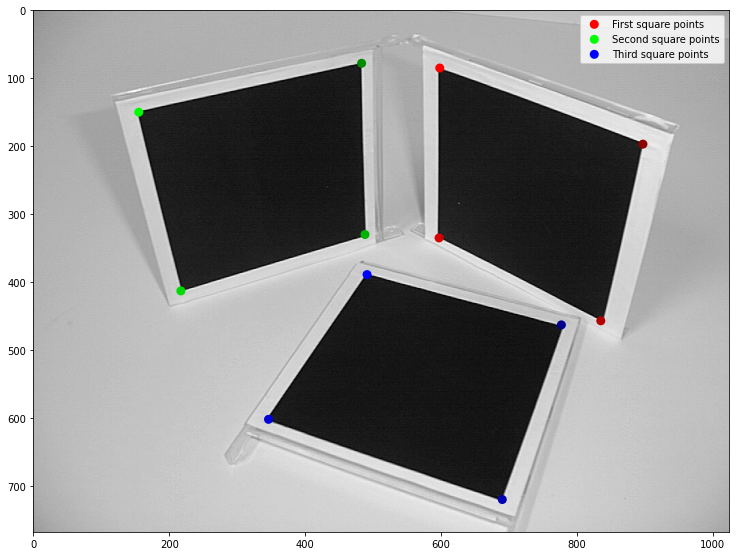

In [15]:
# four points of square 1
xx1 = [[598,85,1], [597,335,1], [835,457,1], [897,197,1]]
# four points of square 2
xx2 = [[155,150,1], [217,413,1], [488,330,1], [483,78,1]]
# four points of square 3
xx3 = [[491,389,1], [346,602,1], [690,720,1], [777,463,1]]

# plot of these points
plt.figure(figsize=(6.4*2, 4.8*2))
plt.imshow(img, cmap = 'gray'), 
plt.scatter([xx1[0][0], xx1[1][0], xx1[2][0], xx1[3][0]], [xx1[0][1], xx1[1][1], xx1[2][1], xx1[3][1]], 
            color = [[1,0,0], [0.85,0,0], [0.7,0,0], [0.55,0,0]], linewidth = 3, label = "First square points"),
plt.scatter([xx2[0][0], xx2[1][0], xx2[2][0], xx2[3][0]], [xx2[0][1], xx2[1][1], xx2[2][1], xx2[3][1]], 
            color = [[0,1,0], [0,0.85,0], [0,0.7,0], [0,0.55,0]], linewidth = 3, label = "Second square points"),
plt.scatter([xx3[0][0], xx3[1][0], xx3[2][0], xx3[3][0]], [xx3[0][1], xx3[1][1], xx3[2][1], xx3[3][1]], 
            color = [[0,0,1], [0,0,0.85], [0,0,0.7], [0,0,0.55]], linewidth = 3, label = "Third square points"),
plt.legend()

Having defined the four corners of the square to map from ($[[0,\ 1],\ [0,\ 0],\ [1,\ 0],\ [1,\ 1]]$), look for the homographs $H_1$, $H_2$, $H_3$ that map the points of this square to the points of the corresponding square in the image.

In [16]:
squareCorners = np.array([[0,1,1],[0,0,1],[1,0,1],[1,1,1]])

H1 = cv2.findHomography(np.float32(squareCorners), np.float32(xx1))[0]
H2 = cv2.findHomography(np.float32(squareCorners), np.float32(xx2))[0]
H3 = cv2.findHomography(np.float32(squareCorners), np.float32(xx3))[0]

Define $\omega$ as the conic matrix: 
$
\begin{pmatrix}
  a & \frac{b}{2} & \frac{d}{2} \\
  \frac{b}{2} & c & \frac{e}{2} \\
  \frac{d}{2} & \frac{e}{2} & f
\end{pmatrix}
$.

In [17]:
(a,b,c,d,e,f) = symbols("a,b,c,d,e,f", real = True)
w = np.array([[a, b/2, d/2],
             [b/2, c, e/2],
             [d/2, e/2, f]])
Matrix(w)

Matrix([
[  a, b/2, d/2],
[b/2,   c, e/2],
[d/2, e/2,   f]])

For each $H_i$, and therefore for each pair of circular points (which we define later for the proof), we have two formulas: 
1.   $h_1^T\omega h_2 = 0$
2.   $h_1^T\omega h_1 = h_2^T\omega h_2\ \to\ h_1^T\omega h_1 - h_2^T\omega h_2 = 0$

We have three homographs, so in the end we have 6 equations.



In [18]:
# Equation by H1
eq1 = np.dot(np.dot(H1[:,0].T, w), H1[:,1])
eq2 = np.dot(np.dot(H1[:,0].T, w), H1[:,0]) - (np.dot(np.dot(H1[:,1].T, w), H1[:,1]))
# Equation by H2
eq3 = np.dot(np.dot(H2[:,0].T, w), H2[:,1])
eq4 = np.dot(np.dot(H2[:,0].T, w), H2[:,0]) - (np.dot(np.dot(H2[:,1].T, w), H2[:,1]))
# Equation by H3
eq5 = np.dot(np.dot(H3[:,0].T, w), H3[:,1])
eq6 = np.dot(np.dot(H3[:,0].T, w), H3[:,0]) - (np.dot(np.dot(H3[:,1].T, w), H3[:,1]))

print("Equation by H1\nEquation 1: " + str(eq1) + " = 0");
print("Equation 2: " + str(eq2) + " = 0\n"); 
print("Equation by H2\nEquation 3: " + str(eq3) + " = 0");
print("Equation 4: " + str(eq4) + " = 0\n"); 
print("Equation by H3\nEquation 5: " + str(eq5) + " = 0");
print("Equation 6: " + str(eq6) + " = 0\n");

Equation by H1
Equation 1: -15049.4729109204*a - 22401.8247032168*b - 18304.2245366175*c - 6.51819635587854*d + 9.17681135868702*e + 0.0208728700760096*f = 0
Equation 2: 8556.84948048692*a - 18546.5086831306*b - 65622.0834320791*c - 35.5588431577288*d - 55.7460163448913*e - 0.0189344196969839*f = 0

Equation by H2
Equation 3: -28064.0470775251*a - 43365.4130729559*b + 15119.7332131337*c - 31.3831439935359*d - 8.90587661544572*e - 0.0160122623504222*f = 0
Equation 4: 92196.6523491819*a - 42184.2775368107*b - 80697.1442221538*c + 14.0951690294231*d - 54.6508646756859*e - 0.0210794809844908*f = 0

Equation by H3
Equation 5: 70849.2748671962*a - 10963.4569519834*b - 5277.51386781265*c + 18.4337857214527*d + 11.3945377227817*e - 0.0243086881085258*f = 0
Equation 6: 6582.47636827879*a + 43486.3124188331*b - 12968.1146322645*c - 89.2050555861605*d + 24.0596516996203*e - 0.0441608245213182*f = 0



We create a system $X$ of five of these six equations and solve it by obtaining those values of $a$, $b$, $c$, $d$, $e$ and $f$ such that each equation is **0**. We note in the result that each letter **depends on** $f$ **whatever its value**, and so we can decide to have **f as the value 1** so that all the results are simplified.

In [19]:
X = np.array([eq1, eq2, eq3, eq4, eq5])
sol = solve(X)
sol

{a: 6.94610169817874e-7*f,
 b: 1.04898536547187e-7*f,
 c: 5.73060062739873e-7*f,
 d: -0.000894717902081389*f,
 e: -0.000371802501816627*f}

Now we take the values of $a$, $b, $c, $d$, $e$ and $f$ calculated above and replace them in $\omega$ to obtain the final $\omega$ matrix with the values inside. 

To eliminate $f$ in $\omega$, since each element depends on $f$, I divided each value by $f$.

In [20]:
wSubs = np.array([[sol[a]/f, sol[b]/f/2, sol[d]/f/2],
                  [sol[b]/f/2, sol[c]/f, sol[e]/f/2],
                  [sol[d]/f/2, sol[e]/f/2, 1.0]], dtype = np.float32)
Matrix(wSubs)

Matrix([
[   6.9461e-7,   5.24493e-8, -0.000447359],
[  5.24493e-8,    5.7306e-7, -0.000185901],
[-0.000447359, -0.000185901,          1.0]])

In order to prove that $\omega$ is the *conic of the six circular points* mentioned at the beginning, we have to say a couple of things:
*   **The circular points** are defined as $H(1,\ ±i,\ 0)$. Translated, $H = (h_1,\ h_2,\ h_3)$ and therefore the *circular points* will be $h_1 ± ih_2$. From these two circular points derive the two equations used above;
*   **If the circular points lie on the** $\omega$ conic then $(h_1 ± ih_2)^T\omega (h_1 ± ih_2)=0$.

In the print the values are very close to 0 but not 0 most likely due to rounding in the process.

In [21]:
# Circular points given by first square
cp1 = H1[:,0] + H1[:,1]*1j
cp2 = H1[:,0] - H1[:,1]*1j
# Circular points given by second square
cp3 = H2[:,0] + H2[:,1]*1j
cp4 = H2[:,0] - H2[:,1]*1j
# Circular points given by third square
cp5 = H3[:,0] + H3[:,1]*1j
cp6 = H3[:,0] - H3[:,1]*1j

print("Proof of circular point 1: " + str(cp1@wSubs@cp1))
print("Proof of circular point 2: " + str(cp2@wSubs@cp2))
print("Proof of circular point 3: " + str(cp3@wSubs@cp3))
print("Proof of circular point 4: " + str(cp4@wSubs@cp4))
print("Proof of circular point 5: " + str(cp5@wSubs@cp5))
print("Proof of circular point 6: " + str(cp6@wSubs@cp6))

Proof of circular point 1: (2.1815808187719554e-09+1.1335774489738646e-09j)
Proof of circular point 2: (2.1815808187719554e-09-1.1335774489738646e-09j)
Proof of circular point 3: (-6.971736729588507e-10+2.3306420649427344e-09j)
Proof of circular point 4: (-6.971736729588507e-10-2.3306420649427344e-09j)
Proof of circular point 5: (0.028409496435591028-3.879041816589651e-09j)
Proof of circular point 6: (0.028409496435591028+3.879041816589651e-09j)


Finally the **Cholesky factorization** given by the *scipy.linalg.cholesky()* function was done.

As input the inverse of $\omega$ was passed because we know that $\omega = (KK^T)^{-1}$ and cholesky factorization returns $N$ given $NN^T$. By doing the inverse of $\omega$ we get $KK^T$ and then $K$ from the factorization.

In [22]:
K = scipy.linalg.cholesky(np.linalg.inv(wSubs))
Matrix(K)

Matrix([
[1424.61, 81.2578, 0.652418],
[    0.0, 1362.72, 0.253331],
[    0.0,     0.0,      1.0]])